In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("winequality.csv")

In [32]:
df.shape

(6497, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [34]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [35]:
df.duplicated().sum()

1177

In [36]:
df=df.drop_duplicates()

In [37]:
df.shape

(5320, 14)

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.189662
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.392070
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [40]:
object_cols = df.select_dtypes(include = ['object'])

In [41]:
object_cols.columns

Index(['color'], dtype='object')

In [42]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts(normalize = True)*100)
        print()

In [43]:
discrete_univariate_analysis(object_cols)

********** color **********
count              5320
nunique               2
unique     [red, white]
Name: color, dtype: object
Value Counts: 
 white    74.454887
red      25.545113
Name: color, dtype: float64



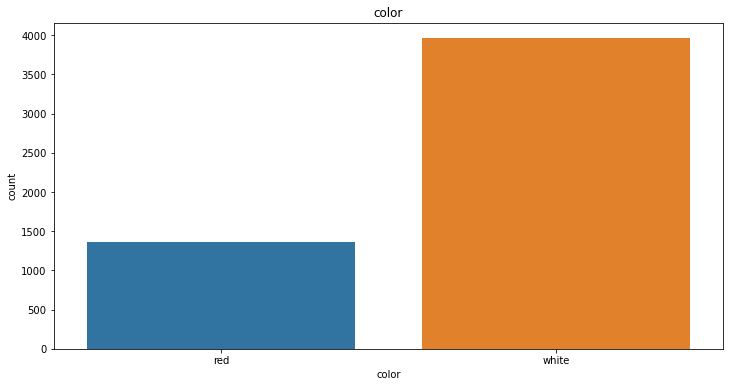

In [44]:
for col in object_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col}')

In [45]:
for col in object_cols:
    var = df.groupby('color')
    print(var[col].value_counts())

color  color
red    red      1359
white  white    3961
Name: color, dtype: int64


In [46]:
numerical_cols = df.select_dtypes(include = ['int64','float64'])

In [47]:
numerical_cols.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good'],
      dtype='object')

In [48]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
        print()

In [49]:
numerical_univariate_analysis(numerical_cols)

********** fixed acidity **********
count     5320.000000
min          3.800000
max         15.900000
mean         7.215179
median       7.000000
std          1.319671
skew         1.650417
kurt         4.589079
Name: fixed acidity, dtype: float64

********** volatile acidity **********
count     5320.000000
min          0.080000
max          1.580000
mean         0.344130
median       0.300000
std          0.168248
skew         1.504557
kurt         2.863175
Name: volatile acidity, dtype: float64

********** citric acid **********
count     5320.000000
min          0.000000
max          1.660000
mean         0.318494
median       0.310000
std          0.147157
skew         0.484309
kurt         2.582471
Name: citric acid, dtype: float64

********** residual sugar **********
count     5320.000000
min          0.600000
max         65.800000
mean         5.048477
median       2.700000
std          4.500180
skew         1.706550
kurt         7.025595
Name: residual sugar, dtype: float64



In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.189662
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.392070
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [52]:
#numerical_columns = df_.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical columns
data_no_outliers = df.copy()  # Create a copy of the original data
for column in numerical_cols:
    data_no_outliers = remove_outliers(data_no_outliers, column)

fixed acidity              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
volatile acidity        AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
citric acid                AxesSubplot(0.125,0.677439;0.352273x0.0920732)
residual sugar          AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
chlorides                  AxesSubplot(0.125,0.566951;0.352273x0.0920732)
free sulfur dioxide     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
total sulfur dioxide       AxesSubplot(0.125,0.456463;0.352273x0.0920732)
density                 AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
pH                         AxesSubplot(0.125,0.345976;0.352273x0.0920732)
sulphates               AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
alcohol                    AxesSubplot(0.125,0.235488;0.352273x0.0920732)
quality                 AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
good                          AxesSubplot(0.125,0.125;0.352273x0.0920732)
dtype: object

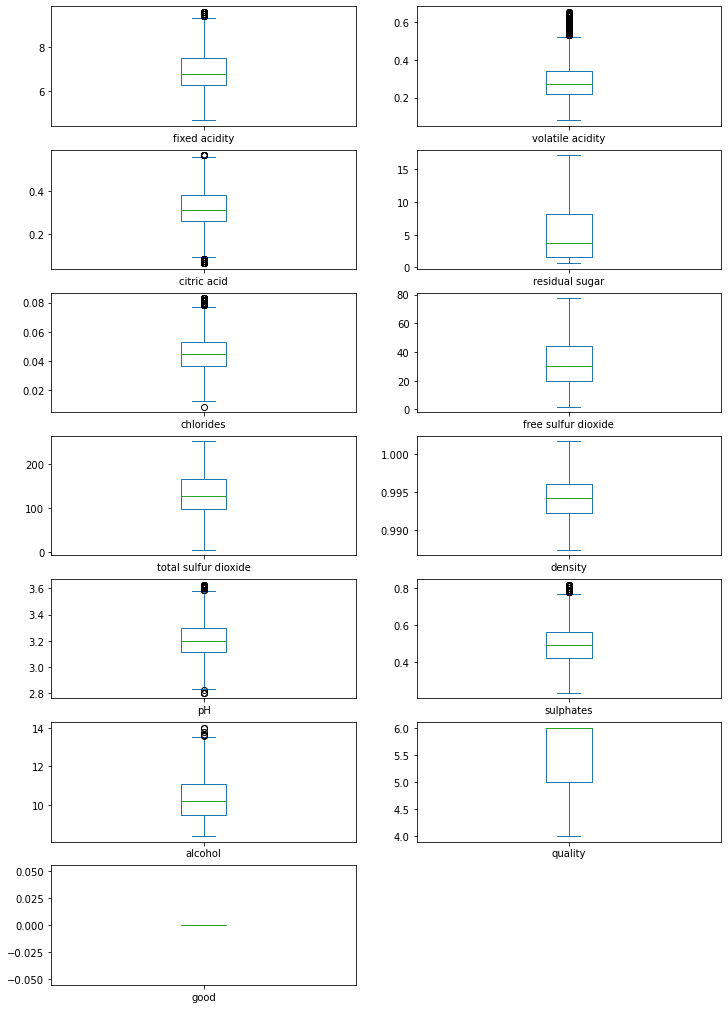

In [54]:
data_no_outliers.plot(kind='box', subplots=True, layout=(7, 2), figsize=(12, 18))

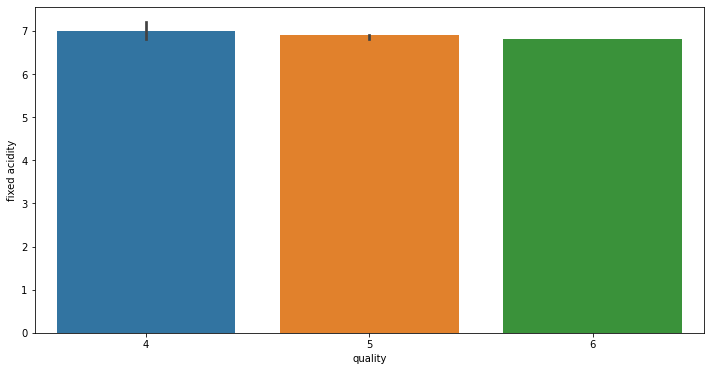

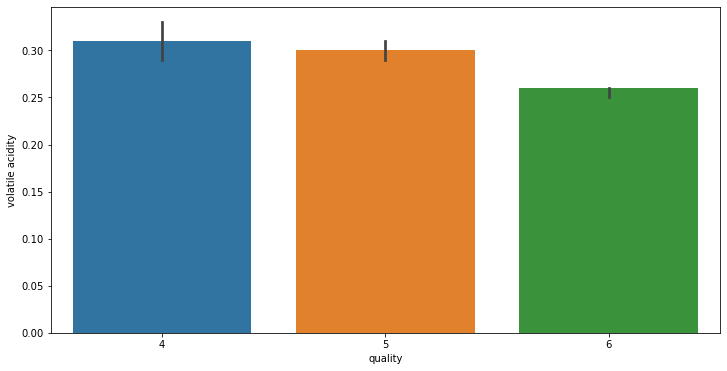

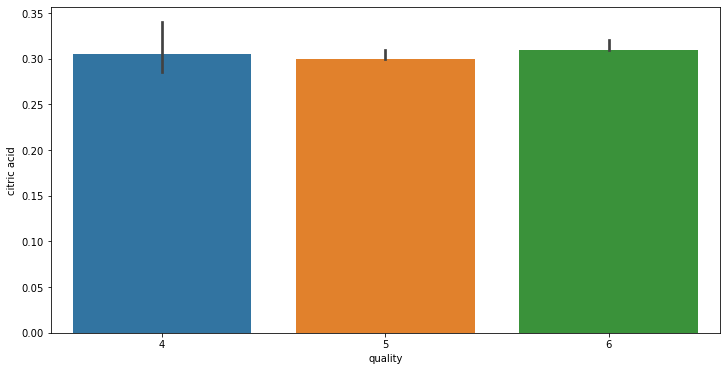

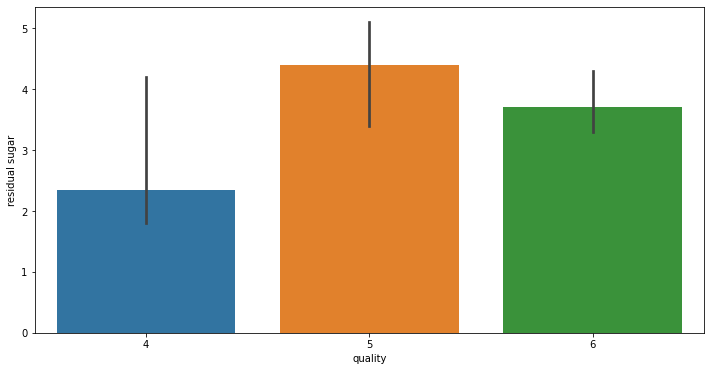

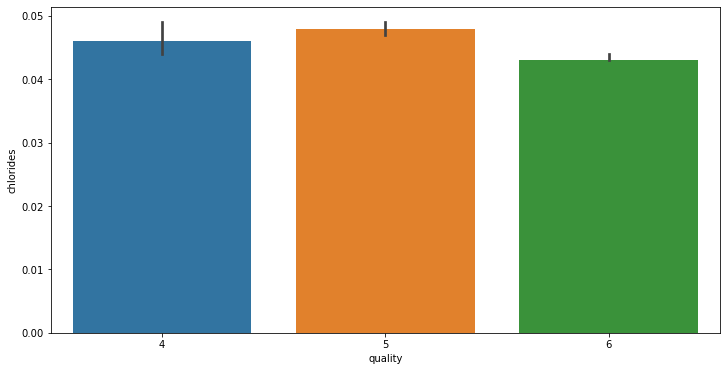

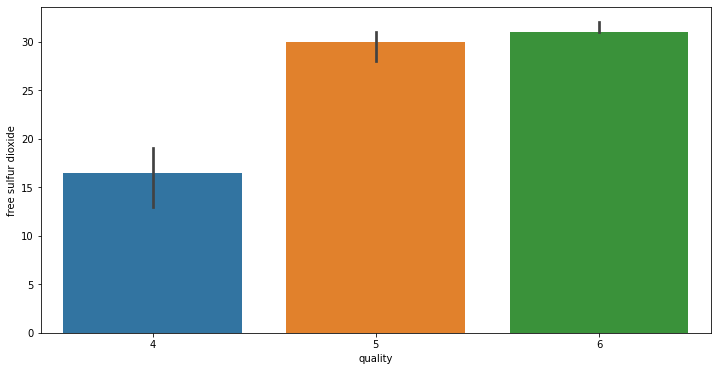

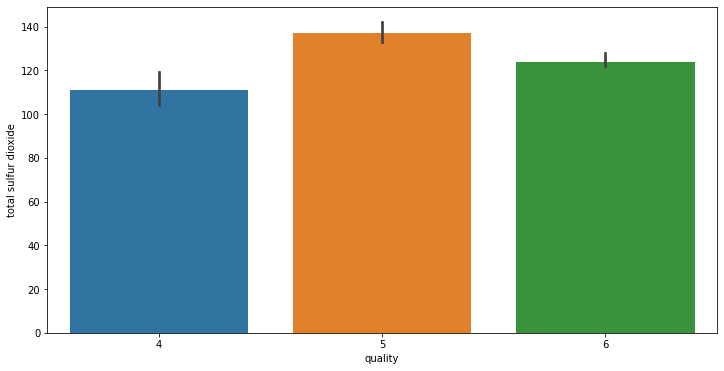

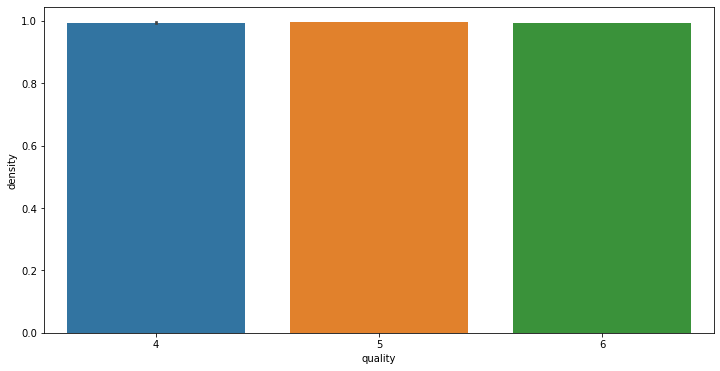

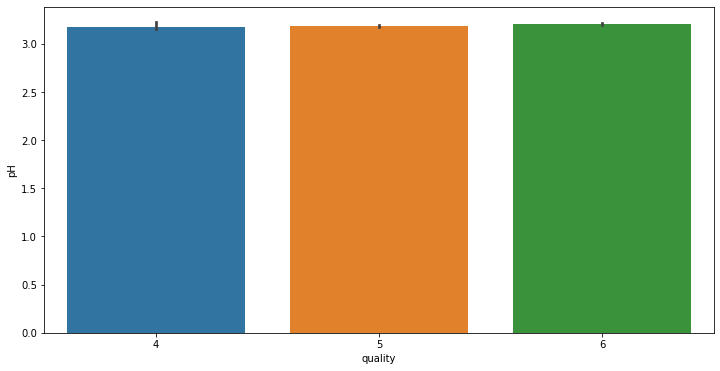

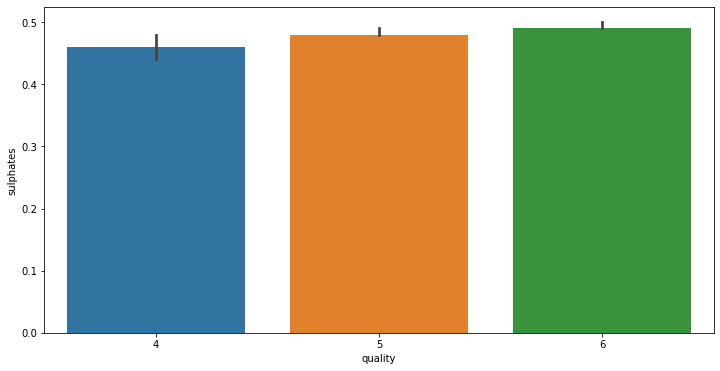

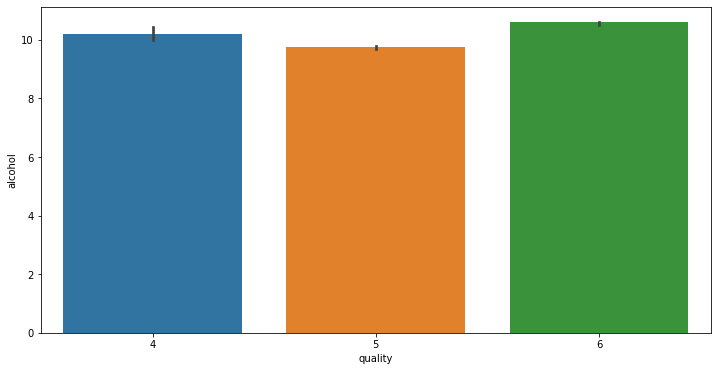

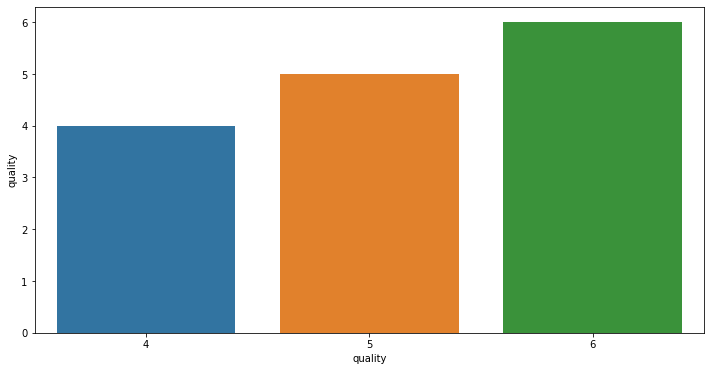

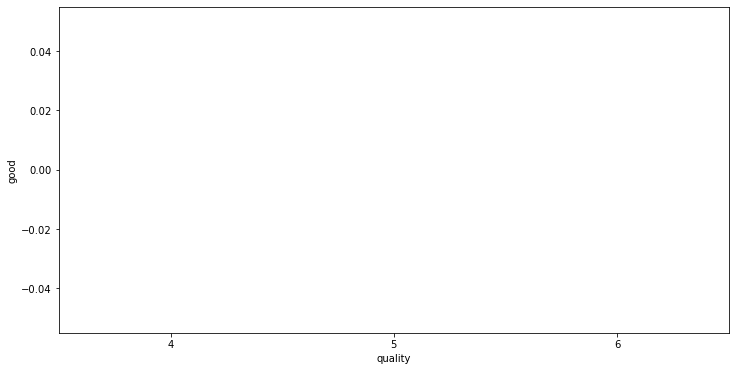

In [56]:
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='quality', y=col, data=data_no_outliers, estimator=np.median)

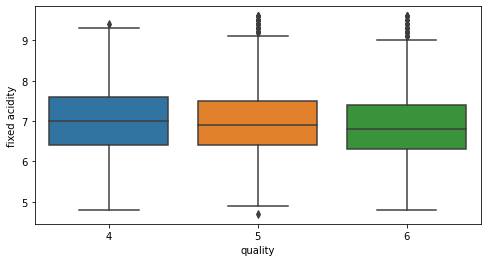

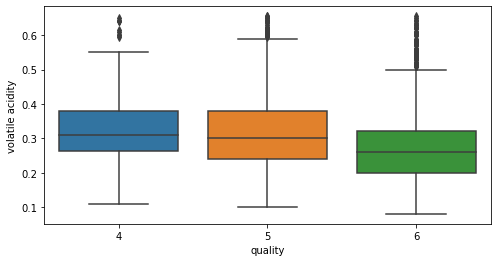

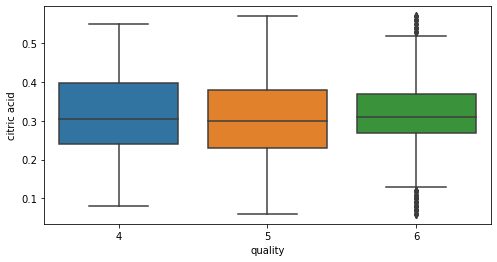

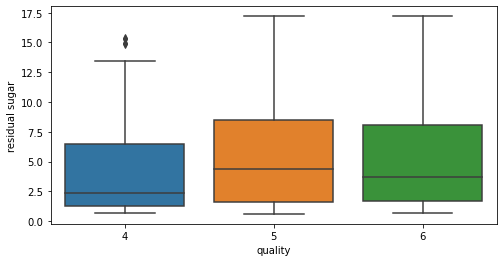

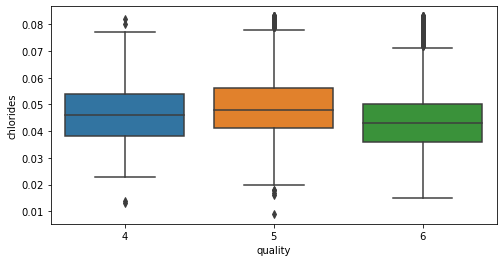

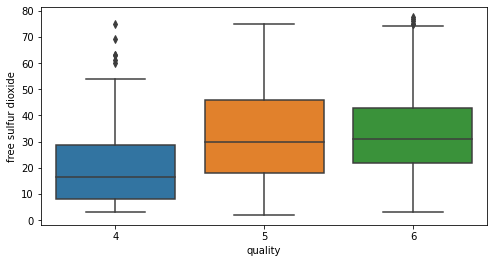

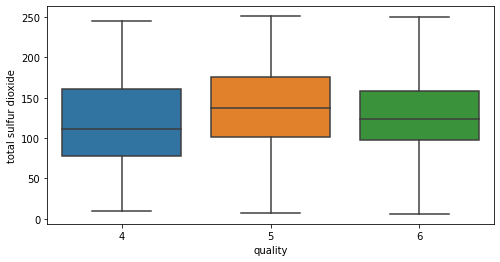

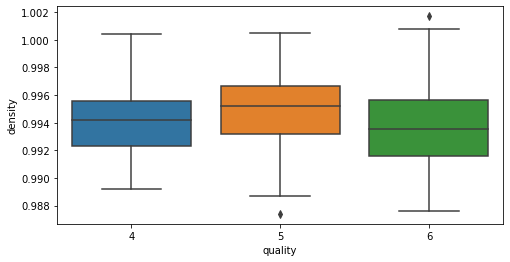

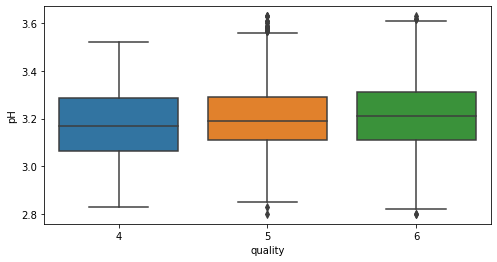

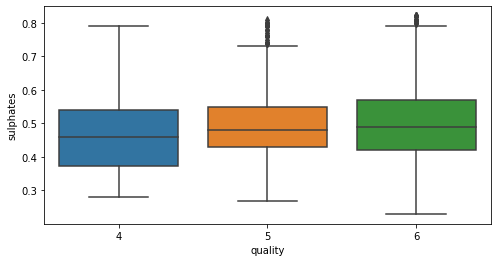

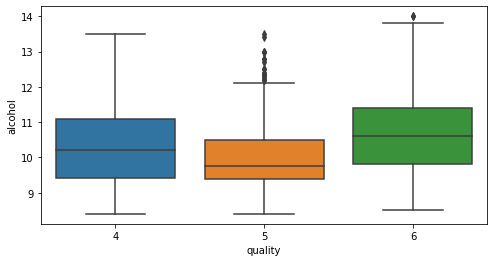

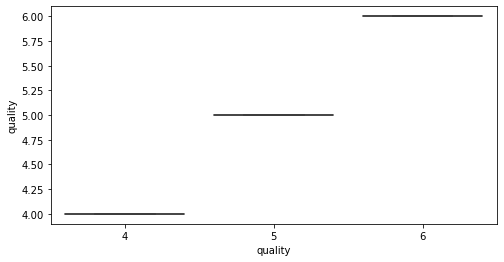

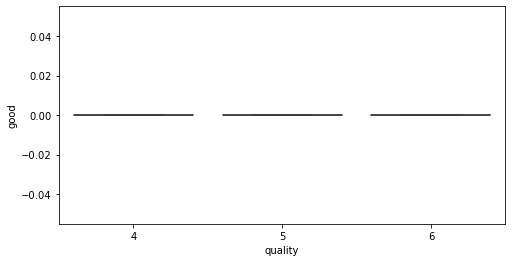

In [57]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=data_no_outliers)

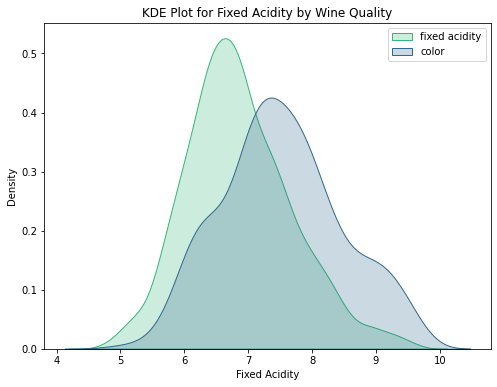

In [59]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_no_outliers, x='fixed acidity', hue='color', fill=True, common_norm=False, palette='viridis')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')
plt.title('KDE Plot for Fixed Acidity by Wine Quality')
plt.legend(["fixed acidity","color"],loc='upper right')
plt.show()


In [64]:
df['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [66]:
bin_edges = [ 2.72, 3.11,3.21 , 3.33,4.01 ] # Filling this list with five values of pH
bin_names = [ 'High','Moderately High' ,'Medium' ,'Low' ]


In [67]:
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)


In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red,Moderately High
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,red,Low


In [69]:
# Find the mean quality of each acidity level with groupby
quality_acidity_mean = []
quality_acidity_mean = df.groupby('acidity_levels').mean()['quality']
quality_acidity_mean


acidity_levels
High               5.728024
Moderately High    5.766917
Medium             5.852624
Low                5.834254
Name: quality, dtype: float64

In [70]:
acidity_mean = df.groupby('acidity_levels').mean()['pH']

In [71]:
acidity_mean


acidity_levels
High               3.031495
Moderately High    3.164835
Medium             3.270575
Low                3.440387
Name: pH, dtype: float64

In [72]:
df['fixed acidity'].describe()

count    5320.000000
mean        7.215179
std         1.319671
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [73]:
quality_acidity_mean

acidity_levels
High               5.728024
Moderately High    5.766917
Medium             5.852624
Low                5.834254
Name: quality, dtype: float64

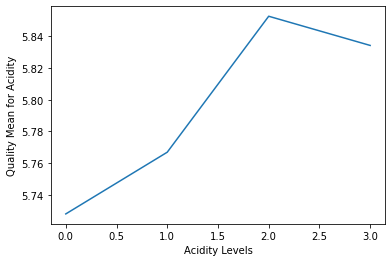

In [76]:
import matplotlib.pyplot as plt
plt.plot([5.7280,5.7669,5.8526, 5.8342])
plt.ylabel('Quality Mean for Acidity')
plt.xlabel('Acidity Levels')
plt.show();

#### from above figure,In this line plot, we see clearly that quality rises as does acidity.

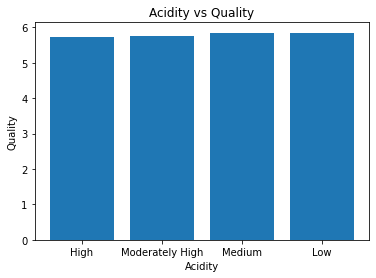

In [77]:
# Create a bar chart with proper labels
locations_pH = [1,2,3,4]

#points = [low_sugar_mean_quality, high_sugar_mean_quality]
#plt.bar(locations_sugar, points, tick_label=labels_sugar)

plt.bar(locations_pH,quality_acidity_mean, tick_label=bin_names)
plt.title('Acidity vs Quality')
plt.xlabel('Acidity')
plt.ylabel('Quality');
